# **Hands On Machine Learning**
<img src='https://m.media-amazon.com/images/I/71UF9mDAX3L._AC_UF1000,1000_QL80_.jpg' width=20%>

**Today we will master Classification**<br>
for this purpose we will use MNIST dataset.<br>
<img src='https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png'>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt

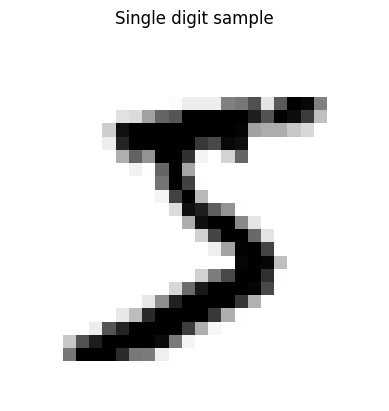

In [8]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.title('Single digit sample')
  plt.imshow(image, cmap='binary')
  plt.axis('off')

plot_digit(X[0]);

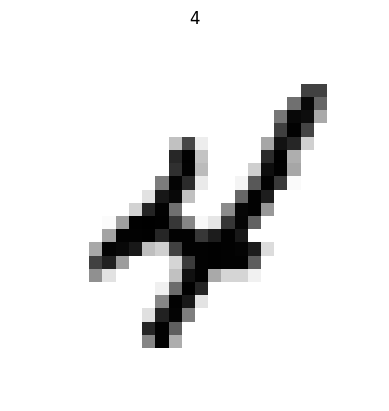

In [9]:
def plot_digit_by_idx(index):
  image = X[index].reshape(28, 28)
  plt.title(y[index])
  plt.imshow(image, cmap='binary')
  plt.axis('off')

plot_digit_by_idx(9);

In [10]:
X_train = X[:60_000]
y_train = y[:60_000]

X_test = X[60_000:]
y_test = y[60_000:]

# **BINARY CLASSIFICATION**
> let's classify whether digit is 5 or not.

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Good point to start with is SGDClassifier as it's simple and efficient (it can work with Large Datasets)

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

[ True]


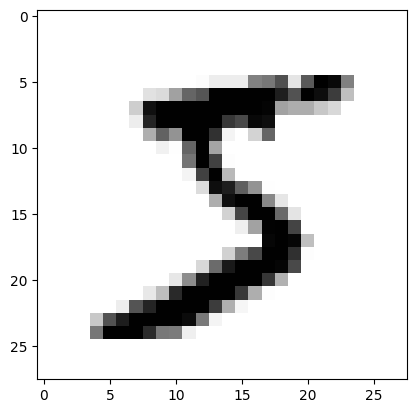

In [14]:
# let's predict something!

print(sgd_clf.predict([X_train[0]]))
plt.imshow(X_train[0].reshape(28, 28), cmap='binary');

# True is true!
# However let's measure our success with real metrics

**Performance Measurement**

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Wow! That's very cool...<br>
## **NO**<br>
Let's check out simple dummy classifier that classifies all samples as the most frequent class

In [16]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

<img src='https://media.tenor.com/H9hzH9fLh3wAAAAi/upal-roflan-upal.gif'>

In [18]:
import seaborn as sns

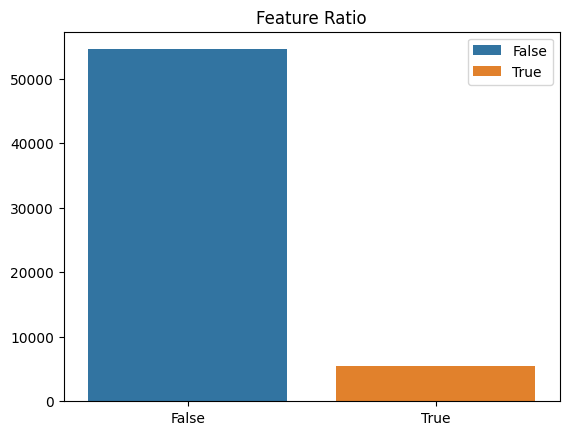

In [19]:
unique, counts = np.unique(y_train_5, return_counts=True)
category_counts = dict(zip(unique, counts))

plt.title('Feature Ratio')
sns.barplot(x=category_counts.keys(),
            y=category_counts.values(),
            hue=category_counts.keys());

Bro...<br>
Working with <u>skewed</u> datasets we should better use Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

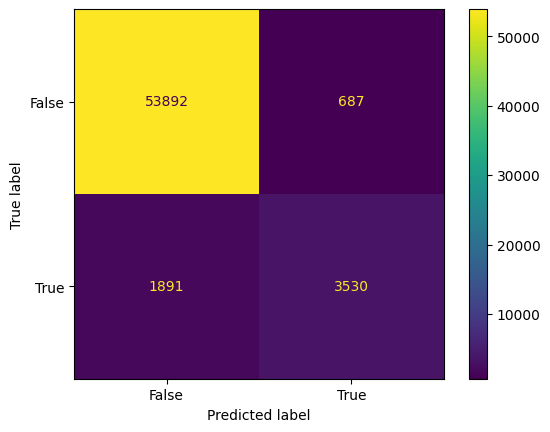

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_clf.classes_)
disp.plot();

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Precision Recall Tradeoff:

In [25]:
y_scores = sgd_clf.decision_function([X_train[0]])  # 5
y_scores

array([2164.22030239])

It gives us particular score that model has.<br>
In such way we can set our own threshold and compare value to it

In [26]:
threshold = 0
y_digit_pred = (y_scores > threshold)
y_digit_pred  # it classifies it as 5!

array([ True])

In [27]:
y_scores = sgd_clf.decision_function([X_train[9]])  # not 5
y_scores

array([-4081.33692831])

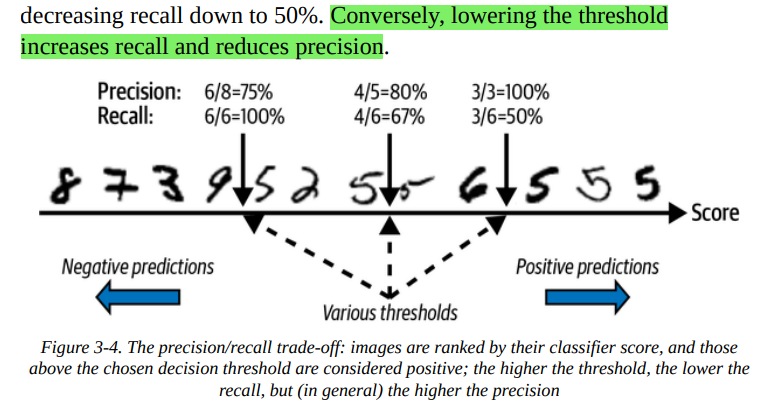

## **HOW TO PICK THRESHOLD?**

In [28]:
# 1. Predict scores for data

# method arg here means it's gonna return scores, not categorical predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method='decision_function')

In [29]:
# 2. To see precision and recall for all possible thresholds use:
# precision_recall_curve

In [30]:
from sklearn.metrics import precision_recall_curve

In [31]:
prec, rec, thresholds = precision_recall_curve(y_train_5, y_scores)

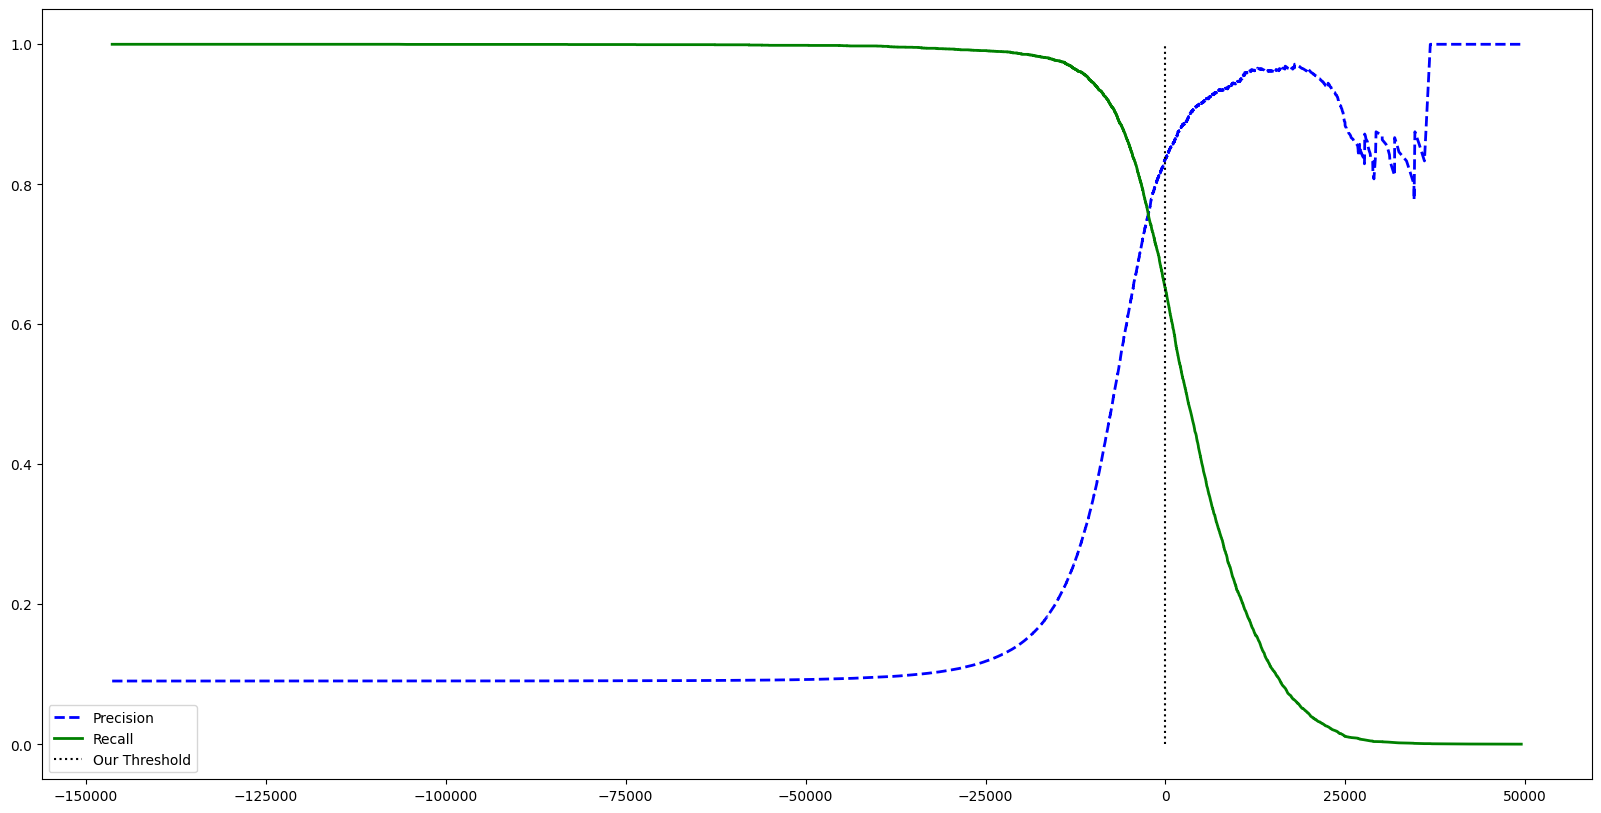

In [32]:
# 3. Visualize curve
plt.figure(figsize=(20, 10))
plt.plot(thresholds, prec[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, rec[:-1], 'g-', label='Recall', linewidth=2)

# vlines stands for verticle line (I guess) with ymin and ymax set
plt.vlines(x=threshold, ymin=0, ymax=1, color='k',
           linestyles='dotted',
           label='Our Threshold')

plt.legend()
plt.show()

Here we can see that threshold=0 has something like 0.8 precision and 0.6 recall.

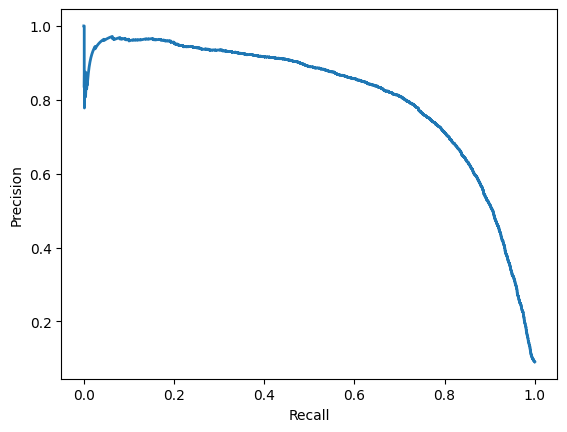

In [33]:
# we could also plot em both like this:

plt.plot(rec, prec, linewidth=2, label='Prec/Rec Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show();

Gaining intuition from graph is not enough.<br>
We want to select particular value with code.

In [34]:
# Get index of first precision higher or equal to 0.9
# For that one this condition is True
idx_for_90_precision = (prec >= 0.9).argmax()

In [35]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [36]:
# we found threshold needed!
# Now let's predict with it:

y_train_pred_prec90 = (y_scores >= threshold_for_90_precision)
y_train_pred_prec90

array([False, False, False, ...,  True, False, False])

In [37]:
from sklearn.metrics import precision_score, recall_score

In [38]:
precision_score(y_train_5, y_train_pred_prec90)

0.9000345901072293

<img src='https://media.tenor.com/TrZcpR0Kde8AAAAi/cat-meme-funny.gif' width=20%>

In [39]:
recall_score(y_train_5, y_train_pred_prec90)

0.4799852425751706

<h1 align='center'>When Do we use it?</h1><br>
When precision is more important then recall.<br>
For example:<br>
For YouTube kids* app that will be used by children we should take care about precision more<br>
i.e we would prefer normal video to be classified as dangerous than dangerous video classified as normal.<br>
It's okay to hide new Mr Beast video from kids but not to show them 1Man1Jar video...<br>
<img src='https://media.tenor.com/izxw0H5mkAQAAAAi/meme-realisation.gif' width=10%><br>

___

*I have never worked at Google so this was given as an example

## **ROC CURVE**

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

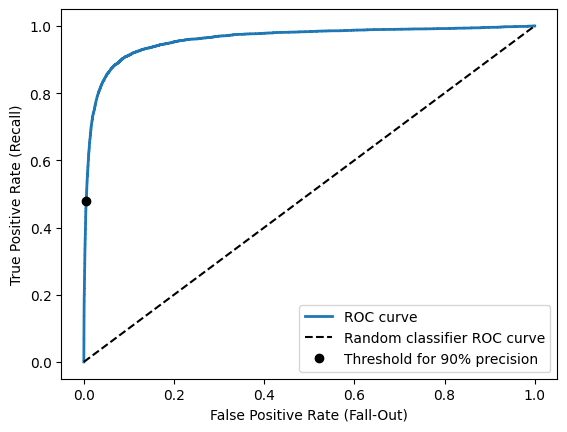

In [41]:
# get tpr and fpr for threshold with 90% precision
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier ROC curve')
plt.plot([fpr_90], [tpr_90], 'ko', label='Threshold for 90% precision')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')

plt.legend()
plt.show();

<img src='https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/22490/header.jpg?t=1497935499' width=40%>

AUC - Area Under Curve. Measures Quality of our classifier.<br>
Ideal Classifier AUC = 1<br>
Random Classifier AUC = 0.5

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## **USE ROC:**
- when you take prior False Negatives (recall)

## **USE PR:**
- when you take care about False Positives (precision)

Now Let's have Random Forest Classifier here

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_clf = RandomForestClassifier(random_state=42)

In [46]:
forest_y_prob = cross_val_predict(forest_clf, X_train, y_train_5,
                                  cv=3, method='predict_proba')

In [47]:
# model is 89% sure 1st digit is 5 and 2nd one is not
forest_y_prob[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

**Note✍:**<br>
> predict_proba predicts both probabilities

In [48]:
y_scores_forest = forest_y_prob[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

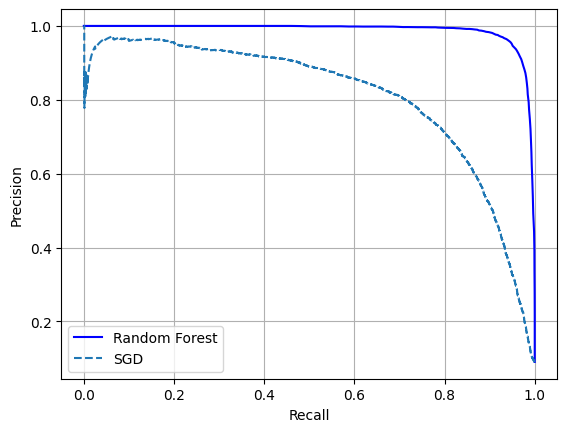

In [49]:
plt.plot(recalls_forest, precisions_forest, 'b-', label='Random Forest')
plt.plot(rec, prec, '--', label='SGD')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show();

**From here we see that Random Forest performs much better as it's closer to the righ top**<br>
<img src='https://preview.redd.it/a0tmj02qhl921.jpg?auto=webp&s=6209fe8e26326a2067975b5ce619a6911f2acefe' width=40%><br>
Image 1.1    Beautiful Skyrim Forest<br>
___
Let's check other metrics of it!

In [50]:
y_train_pred_forest = forest_y_prob[:, 1] >= 0.5

In [51]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [53]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

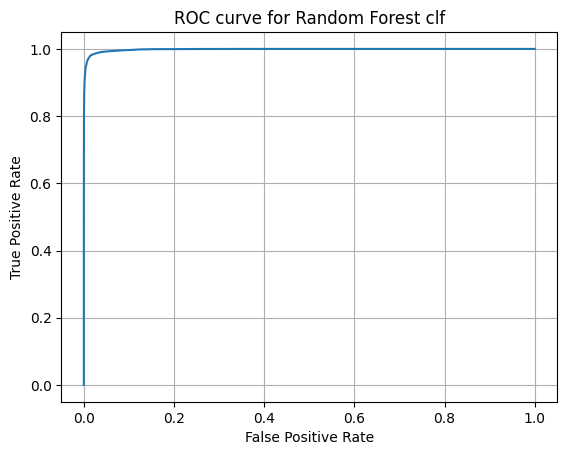

In [54]:
plt.plot(fpr_forest, tpr_forest)
plt.grid()
plt.title('ROC curve for Random Forest clf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [55]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [56]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# **MULTICLASS CLASSIFICATION**
<img src='https://i.ytimg.com/vi/ATLDCeKKDAw/hq720.jpg?sqp=-oaymwE7CK4FEIIDSFryq4qpAy0IARUAAAAAGAElAADIQj0AgKJD8AEB-AH-CYAC0AWKAgwIABABGHIgWihAMA8=&rs=AOn4CLBtDS0KI1sCFQW4FLXauRnyNJPY5A' width=20%><br>
It's cool that we can predict if image is 5 or not, but let's move onto something cooler😎

In [57]:
from sklearn.svm import SVC

In [58]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [59]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [60]:
svm_clf.decision_function([X_train[0]])

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [61]:
svm_clf.decision_function([X_train[0]]).argmax()

5

**EZ**<br>
value with 5th index is the highest one!<br>
But in general we have to check out our labels like this:

In [62]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

## **How does it work?**<br>
A lot of classifiers can handle only binary data, meaning multiclass is not supported...<br>
However mankind found the solution:<br>
**OvA** also known as **OvR**<br>
One Vs All (trains binary classifier for each class (like we did it with 5 classification) and then votes for the classifier with the highest decision score). Higher decision score signs that model is confident about it's prediction as our decision_function score is higher than threshold<br>

**OvO**<br>
One vs One (train $N \times (N - 1) / 2$ classifiers to classify each category face to face). You pick the class that won most duels.<br>
It's inefficient, but sometimes can be useful.<br>

____

Scikit Learn automaticaly detects if our data is multiclass and applies one of the strategies.<br>
We can also specify which strategy to use.

In [63]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(estimator=SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [64]:
print(ovr_clf.predict([X_train[0]]))
len(ovr_clf.estimators_)  # N classifier (10 in our case)

['5']


10

In [65]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(estimator=SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [66]:
print(ovo_clf.predict([X_train[0]]))
len(ovo_clf.estimators_)

['5']


45

Okay... Let's fit SGDclassifier

In [67]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

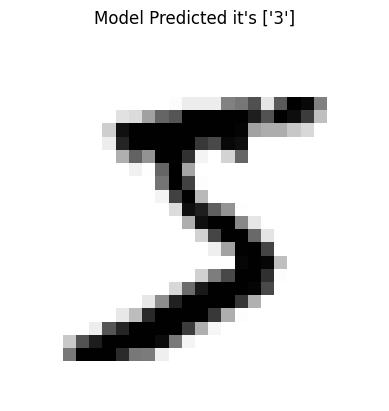

In [68]:
plt.title(f"Model Predicted it's {sgd_clf.predict([X_train[0]])}")
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show();

Not Good. However it doesn't sign that our model is bad. Mayb we're unlucky with this one

In [71]:
cross_val_score(estimator=sgd_clf, X=X_train[:2000], y=y_train[:2000], cv=3,
                scoring='accuracy')

array([0.84857571, 0.80809595, 0.84084084])

Oh... Over 85%! That's good. rly<br>
We can scale our training data and get better results, but I don't want to wait for another 6mins of cross_val_score

# **MOVING FURTHER**
After trying different models we found a promising one.<br>
How do we choose ways of tuning it?

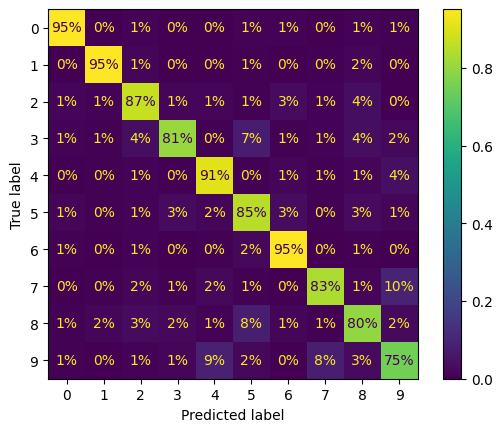

In [74]:
# 1. See confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true',
                                        values_format=".0%")
plt.show();